# Data Preperation

## Setup

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# for pretty printing
def printDf(sprkDF): 
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Spark libs
from pyspark.sql.session import SparkSession

# helper functions
from helpers.helper_functions import translate_to_file_string

# for pretty printing
def printDf(sprkDF): 
    newdf = sprkDF.toPandas()
    from IPython.display import display, HTML
    return HTML(newdf.to_html())

inputFile = translate_to_file_string("./data/Data_Preparation_Result.csv")

## Create Spark Session

In [4]:
#create a SparkSession
spark = (SparkSession
       .builder
       .appName("RKIDATAUNDERSTANDING")
       .getOrCreate())
# create a DataFrame using an ifered Schema 
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ";") \
       .csv(inputFile)   
print(df.printSchema())

root
 |-- Bundesland: string (nullable = true)
 |-- BundeslandIndex: integer (nullable = true)
 |-- Landkreis: string (nullable = true)
 |-- LandkreisIndex: integer (nullable = true)
 |-- Altersgruppe: string (nullable = true)
 |-- AltersgruppeIndex: double (nullable = true)
 |-- Geschlecht: string (nullable = true)
 |-- GeschlechtIndex: double (nullable = true)
 |-- FallStatus: string (nullable = true)
 |-- FallStatusIndex: double (nullable = true)

None


In [5]:
df.count()

3675296

## Lagemaße

In [6]:
printDf(df.summary())

,summary,Bundesland,BundeslandIndex,Landkreis,LandkreisIndex,Altersgruppe,AltersgruppeIndex,Geschlecht,GeschlechtIndex,FallStatus,FallStatusIndex
0,count,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296,3675296
1,mean,None,7.96834676717195,None,8299.551207848293,None,1.2410355519664267,None,0.4848072100859359,None,0.0793993191296701
2,stddev,None,3.674480465407683,None,3652.432864601237,None,1.3592062662803304,None,0.49976919382208435,None,0.3480989234232694
3,min,Baden-Württemberg,1,LK Ahrweiler,1001,A00-A04,0.0,M,0.0,GENESEN,0.0
4,25%,None,5,None,5562,None,0.0,None,0.0,None,0.0
5,50%,None,8,None,8128,None,1.0,None,0.0,None,0.0
6,75%,None,9,None,9774,None,2.0,None,1.0,None,0.0
7,max,Thüringen,16,Städteregion Aachen,16077,A80+,5.0,W,1.0,NICHTEINGETRETEN,2.0


## Balkendiagramme
An dieser Stelle wurde bewusst darauf verzichtet Histogramme zu verwenden, da vor allem Qualitative Merkmale (z.B. Bundesland - Nominal, Geschlecht - Nominal,Altersgruppe - Ordinal,...) vorliegen. Stadtdessen wurde auf Bar-Charts zurückgegriffen.
Hinweis: Der Fallstatus nicht eingetreten, bedeutet, dass die Person aktuell noch erkrankt ist.

### Initalisierung

In [55]:
# Init
%matplotlib inline
import matplotlib.pyplot as plt

### Balkendiagram Bundesland 
Nachfolgend soll ein Balkendiagramm der aktuellen Coronazahlen, nach dem Fallstatus je Bundesland erstellt werden. Dies soll Auskunft über die Verteilung der Fälle nach Bundesland geben.

In [56]:
# Vorbereiten des DataFrames durch Gruppieren des Bundesland und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfBundeslandGrouped = df.groupBy("Bundesland").pivot("FallStatus").count().orderBy("GENESEN","GESTORBEN", "NICHTEINGETRETEN", ascending=False)
dfPandasBundesland = dfBundeslandGrouped.toPandas()
dfBundeslandGrouped.show()


+--------------------+-------+---------+----------------+
|          Bundesland|GENESEN|GESTORBEN|NICHTEINGETRETEN|
+--------------------+-------+---------+----------------+
| Nordrhein-Westfalen| 758263|    16710|           28721|
|              Bayern| 606693|    14935|           16604|
|   Baden-Württemberg| 464304|     9933|           16976|
|              Hessen| 267416|     7319|           11376|
|             Sachsen| 262223|     9656|           11504|
|       Niedersachsen| 246529|     5608|            5524|
|              Berlin| 171545|     3482|            3194|
|     Rheinland-Pfalz| 144334|     3724|            4366|
|           Thüringen| 119711|     4199|            3448|
|         Brandenburg| 101857|     3726|            2575|
|      Sachsen-Anhalt|  91590|     3311|            3373|
|             Hamburg|  71865|     1557|            2675|
|  Schleswig-Holstein|  59752|     1591|            1604|
|Mecklenburg-Vorpo...|  41838|     1120|             850|
|            S

Saving figure attribute_bar_plots


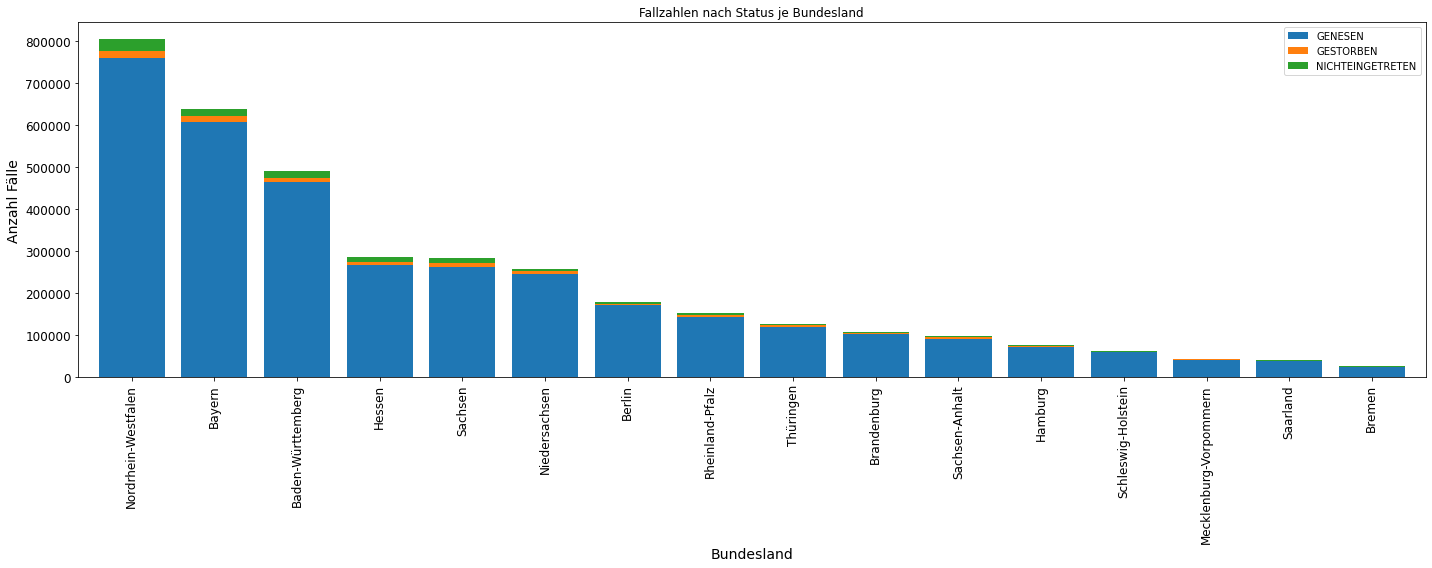

In [54]:
# Erstellen des Balkendiagramms
ax = dfPandasBundesland.plot.bar(x='Bundesland', ylabel="Anzahl Fälle",width=0.8, title="Fallzahlen nach Status je Bundesland", figsize=(20,8), rot=90, stacked=True)
save_fig("attribute_bar_plots")
plt.show()


### Balkendiagram Geschlecht 
Nachfolgend soll ein Balkendiagramm der aktuellen Coronazahlen, nach dem Fallstatus je Bundesland erstellt werden. Dies soll Auskunft über die Verteilung der Fälle nach Bundesland geben.

In [76]:
# Vorbereiten des DataFrames durch Gruppieren des Bundesland und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfGeschlechtGrouped = df.groupBy("Geschlecht").pivot("FallStatus").count().orderBy("GENESEN","GESTORBEN", "NICHTEINGETRETEN", ascending=False)
dfPandasGeschlecht = dfGeschlechtGrouped.toPandas()
dfGeschlechtGrouped.show()

+----------+-------+---------+----------------+
|Geschlecht|GENESEN|GESTORBEN|NICHTEINGETRETEN|
+----------+-------+---------+----------------+
|         W|1795172|    42031|           56283|
|         M|1676658|    46319|           58833|
+----------+-------+---------+----------------+



Saving figure attribute_bar_plots


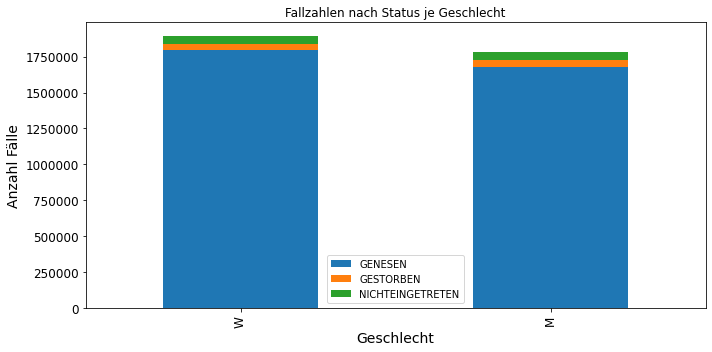

In [77]:
# Erstellen des Balkendiagramms
ax = dfPandasGeschlecht.plot.bar(x='Geschlecht', ylabel="Anzahl Fälle",width=0.5, title="Fallzahlen nach Status je Geschlecht", figsize=(10,5), rot=90, stacked=True)
# Don't want scaled Axis. Have look at https://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi
ax.get_yaxis().get_major_formatter().set_scientific(False)
save_fig("attribute_bar_plots")
plt.show()


### Balkendiagram Altersgruppe 
Nachfolgend soll ein Balkendiagramm der aktuellen Coronazahlen, nach dem Fallstatus je Bundesland erstellt werden. Dies soll Auskunft über die Verteilung der Fälle nach Bundesland geben.

In [88]:
# Vorbereiten des DataFrames durch Gruppieren des Bundesland und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfAltersgruppeGrouped = df.groupBy("Altersgruppe").pivot("FallStatus").count().orderBy("GENESEN","GESTORBEN", "NICHTEINGETRETEN", ascending=False)
dfAltersgruppeGeschlecht = dfAltersgruppeGrouped.toPandas()
dfAltersgruppeGrouped.show()

+------------+-------+---------+----------------+
|Altersgruppe|GENESEN|GESTORBEN|NICHTEINGETRETEN|
+------------+-------+---------+----------------+
|        A80+| 225206|    58560|            3686|
|     A60-A79| 499710|    25978|           14257|
|     A35-A59|1359778|     3629|           42499|
|     A15-A34|1045569|      169|           35357|
|     A00-A04|  89408|        8|            4824|
|     A05-A14| 252159|        6|           14493|
+------------+-------+---------+----------------+



Saving figure attribute_bar_plots


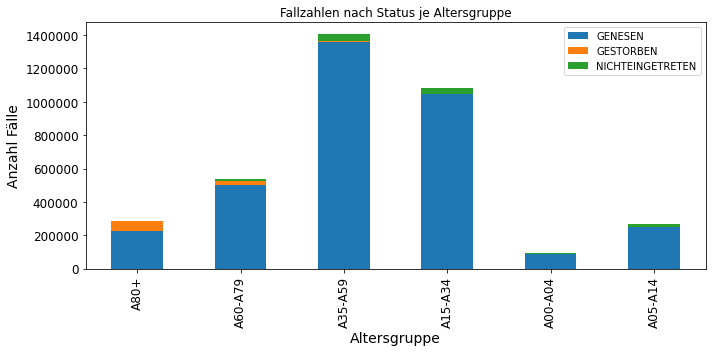

In [89]:
# Erstellen des Balkendiagramms
ax = dfPandasAltersgruppe.plot.bar(x='Altersgruppe', ylabel="Anzahl Fälle",width=0.5, title="Fallzahlen nach Status je Altersgruppe", figsize=(10,5), rot=90, stacked=True)
# Don't want scaled Axis. Have look at https://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi
ax.get_yaxis().get_major_formatter().set_scientific(False)
save_fig("attribute_bar_plots")
plt.show()

## Verstorben nach Altersgruppe und Geschlecht

In [104]:
# Vorbereiten des DataFrames durch Gruppieren des Bundesland und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfVerstorbenGrouped = df.filter(df.FallStatus == "GESTORBEN").groupBy("Altersgruppe").pivot("Geschlecht").count().orderBy("W","M", ascending=True)
dfVerstorbenPandas = dfVerstorbenGrouped.toPandas()
dfVerstorbenGrouped.show()

+------------+-----+-----+
|Altersgruppe|    M|    W|
+------------+-----+-----+
|     A05-A14|    3|    3|
|     A00-A04|    2|    6|
|     A15-A34|  109|   60|
|     A35-A59| 2547| 1082|
|     A60-A79|17039| 8939|
|        A80+|26619|31941|
+------------+-----+-----+



Saving figure attribute_bar_plots


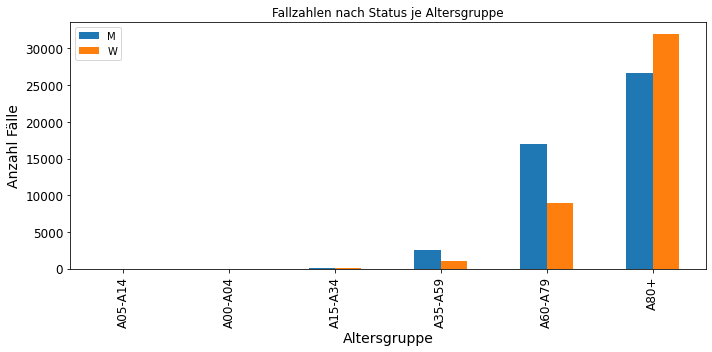

In [105]:
# Erstellen des Balkendiagramms
ax = dfVerstorbenPandas.plot.bar(x='Altersgruppe', ylabel="Anzahl Fälle",width=0.5, title="Fallzahlen nach Status je Altersgruppe", figsize=(10,5), rot=90)
# Don't want scaled Axis. Have look at https://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi
ax.get_yaxis().get_major_formatter().set_scientific(False)
save_fig("attribute_bar_plots")
plt.show()

## Histogramm
### Histogramm über Zeitverlauf

In [ ]:
# Vorbereiten des DataFrames durch Gruppieren des Bundesland und Anwendung der Pivot-Funktion auf das Attribut Fallstatus
dfHist = df.select("")
dfVerstorbenPandas = dfVerstorbenGrouped.toPandas()
dfVerstorbenGrouped.show()

